In [76]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import LabelEncoder

In [247]:
df = pd.read_csv("clean_database.csv",index_col=0)
columns = ["chronic_kidney_disease_diagnosis"]
def a(x):
    if x == 1: 
        return 0.4
    if x == 2: 
        return 0.6
    if x == 3: 
        return 0.8
    if x == 4: 
        return 1
    return 0
df[columns[0]] = df[columns[0]].apply(a)
df["microalbuminuria_category"]=df["microalbuminuria_category"].map({'0': 0,'A1':1,'a1':1,'A1 ':1,'A2':2})
df[df=="137/93"] = 1.47
df["total_cholesterol_pathological"] = df["total_cholesterol_pathological"].astype(np.float64)

In [248]:
cols = df.loc[:,columns]

In [250]:
X = df.drop(columns=columns[0])  
y = df[columns[0]]

X_encoded = X.copy()
for col in X.select_dtypes(include=['object', 'category']).columns:
    X_encoded[col] = LabelEncoder().fit_transform(X[col])

selector = SelectKBest(score_func=f_classif,k=30) 
X_new = selector.fit_transform(X_encoded, y)

selected_features = X_encoded.columns[selector.get_support()]
results =list(zip(selected_features,selector.scores_))
results.sort(key=lambda x:x[1])
print("Mejores características seleccionadas:")
for i,j in results:
    print(f"Atributo {i}: score: {j}")

Mejores características seleccionadas:
Atributo microalbuminuria_category: score: 0.3765928944328592
Atributo age_years: score: 0.5168145625131998
Atributo bmi_category: score: 0.9524347881119053
Atributo ldl_cholesterol_pathological: score: 1.1557629083054815
Atributo hypothyroidism_diagnosis: score: 1.335550229261789
Atributo family_history_overweight_obesity: score: 1.4360701037495507
Atributo other_family_history: score: 1.5587393386069417
Atributo personal_history_hypothyroidism: score: 1.7441425311444476
Atributo hypothyroidism_treatment: score: 1.9681142114376091
Atributo hdl_cholesterol_pathological: score: 3.4041454395875452
Atributo personal_history_dyslipidemia: score: 3.4390326516881244
Atributo family_history_diabetes: score: 3.5954473806193734
Atributo prediabetes_diagnosis: score: 4.359011107989645
Atributo other_personal_history: score: 6.63798231790078
Atributo female_specific_conditions: score: 7.601488649108515
Atributo glomerular_filtration_rate: score: 7.8045022878

In [251]:
cols

,chronic_kidney_disease_diagnosis
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2156,0.4
2157,0.4
2158,0.8
2159,0.6


In [252]:
features= df.drop(columns=columns)

In [269]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( features, cols, test_size=0.2)

In [257]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1725, 58)
(432, 58)
(1725, 1)
(432, 1)


In [261]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import warnings

warnings.filterwarnings("ignore")
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=20, n_jobs=-1),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_jobs=-1),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=300)
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")



Linear Regression
  R² Score: 0.9129
  MAE: 0.0405
  MSE: 0.0051

Random Forest
  R² Score: 1.0000
  MAE: 0.0001
  MSE: 0.0000

SVR
  R² Score: 0.8096
  MAE: 0.0794
  MSE: 0.0110

XGBoost
  R² Score: 0.9999
  MAE: 0.0002
  MSE: 0.0000

Neural Network
  R² Score: 0.5959
  MAE: 0.1127
  MSE: 0.0234


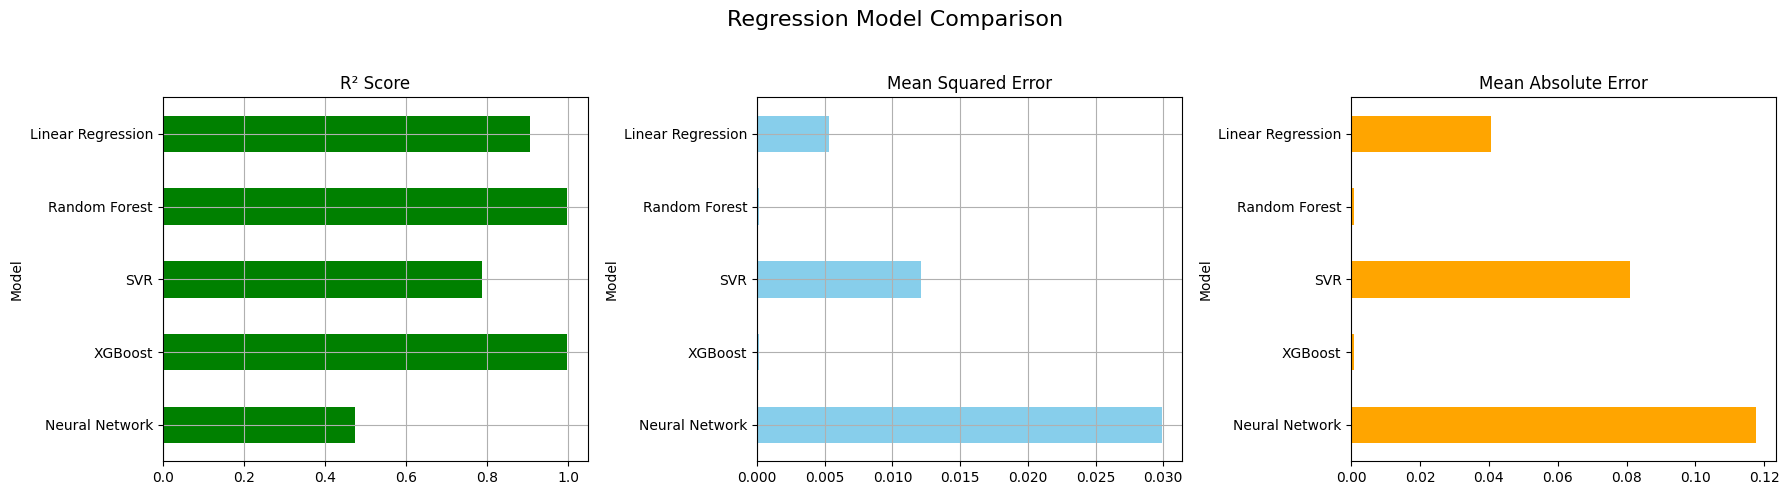

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, n_jobs=-1),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_jobs=-1),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=300)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    })

df_regression = pd.DataFrame(results)
df_regression.set_index("Model", inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

df_regression["R2 Score"].plot(kind="barh", ax=axes[0], color="green", title="R² Score")
axes[0].invert_yaxis(); axes[2].grid(True)

df_regression["MSE"].plot(kind="barh", ax=axes[1], color="skyblue", title="Mean Squared Error")
axes[1].invert_yaxis(); axes[0].grid(True)

df_regression["MAE"].plot(kind="barh", ax=axes[2], color="orange", title="Mean Absolute Error")
axes[2].invert_yaxis(); axes[1].grid(True)


plt.suptitle("Regression Model Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save plot
plt.savefig("img.png")
plt.show()